In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import rc


# Load the Trickcal Revive reviews dataset
file_path_trickcal = r"C:\Users\bisu\Documents\GitHub\crawling\trickcal_revive\trickcal_revive_reviews.csv"
df_trickcal = pd.read_csv(file_path_trickcal)

# Ensure proper datetime conversion
df_trickcal['at'] = pd.to_datetime(df_trickcal['at'])

# Windows 예제
rc('font', family='Malgun Gothic')  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [4]:
# 1. 별점 분포 - 막대그래프
def visualize_score_distribution(data):
    score_counts = data['score'].value_counts().sort_index()
    plt.figure(figsize=(8, 5))
    plt.bar(score_counts.index, score_counts.values, color='skyblue')
    plt.title('별점 분포')
    plt.xlabel('별점')
    plt.ylabel('리뷰 수')
    plt.xticks(score_counts.index)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [5]:
# 2. 특정 기간 동안의 리뷰 빈도 - 라인 차트
def visualize_review_trends(data):
    review_by_date = data.groupby(data['at'].dt.date)['content'].count()
    plt.figure(figsize=(12, 6))
    plt.plot(review_by_date.index, review_by_date.values, marker='o', color='orange')
    plt.title('특정 기간 동안의 리뷰 빈도')
    plt.xlabel('날짜')
    plt.ylabel('리뷰 수')
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

In [6]:
# 3. 긍정/보통/부정 리뷰 비율 - 도넛 차트
def visualize_sentiment_distribution(data):
    data['sentiment'] = data['score'].apply(lambda x: '긍정' if x >= 4 else ('보통' if x == 3 else '부정'))
    sentiment_counts = data['sentiment'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
    plt.title('긍정/보통/부정 리뷰 비율')
    plt.show()

In [7]:
# 4. 주요 키워드 분석 - 막대그래프
def visualize_keyword_frequency(data):
    okt = Okt()
    all_nouns = []
    data['content'].dropna().apply(lambda x: all_nouns.extend(okt.nouns(x)))
    word_freq = Counter(all_nouns).most_common(20)
    words, counts = zip(*word_freq)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='green')
    plt.title('주요 키워드 빈도수')
    plt.xticks(rotation=45)
    plt.ylabel('빈도수')
    plt.xlabel('키워드')
    plt.show()

In [8]:
# 5. 리뷰 길이에 따른 평점 분포 - 산점도
def visualize_review_length_vs_score(data):
    data['review_length'] = data['content'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
    plt.figure(figsize=(8, 5))
    plt.scatter(data['review_length'], data['score'], alpha=0.5, color='purple')
    plt.title('리뷰 길이에 따른 평점 분포')
    plt.xlabel('리뷰 길이')
    plt.ylabel('별점')
    plt.grid()
    plt.show()

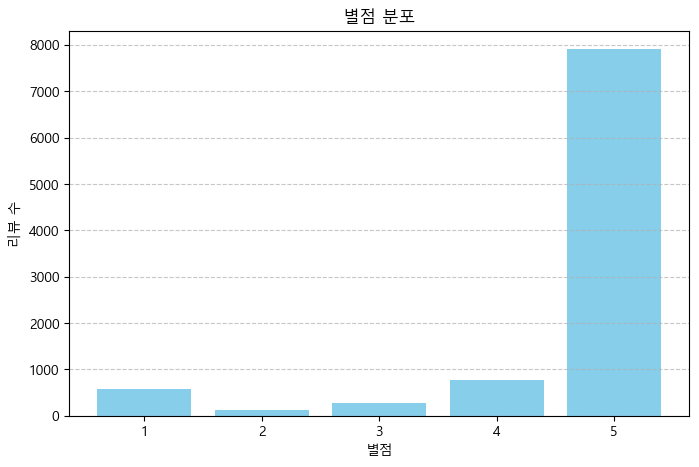

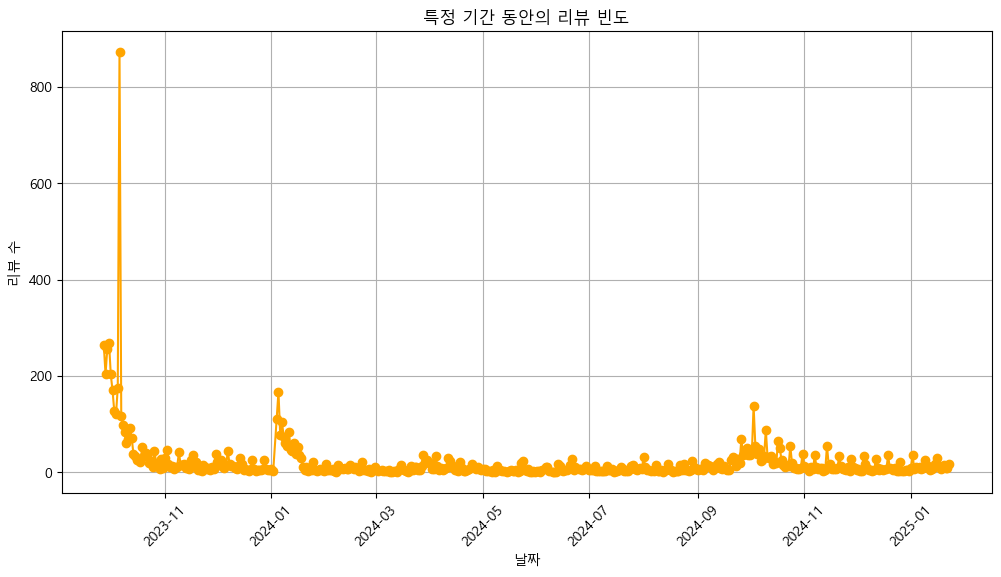

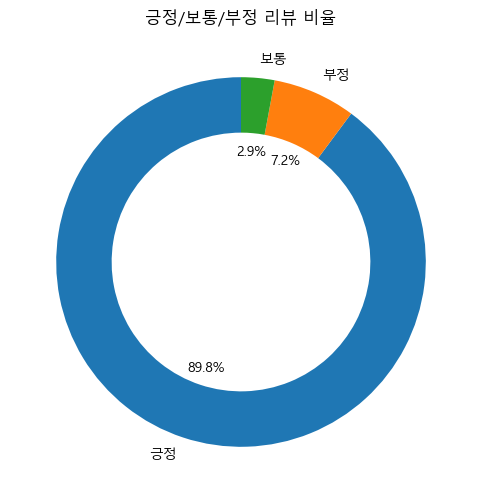

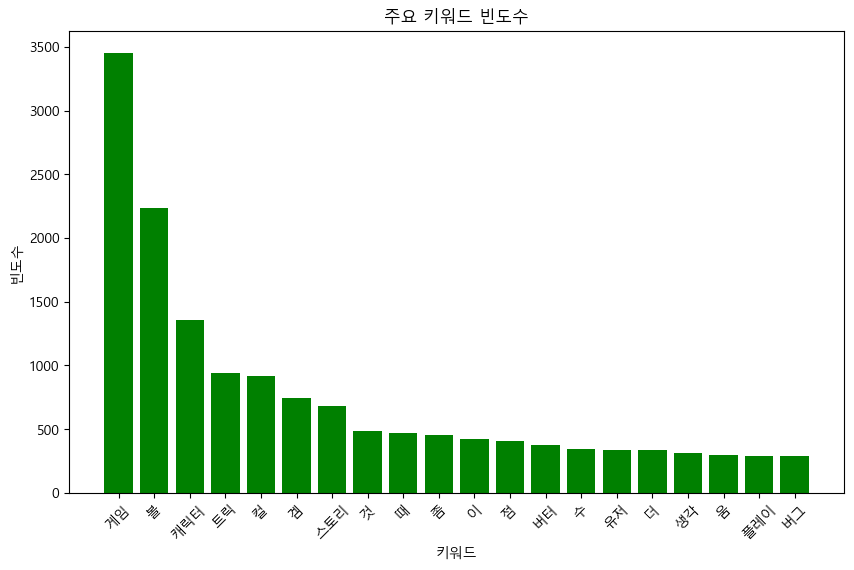

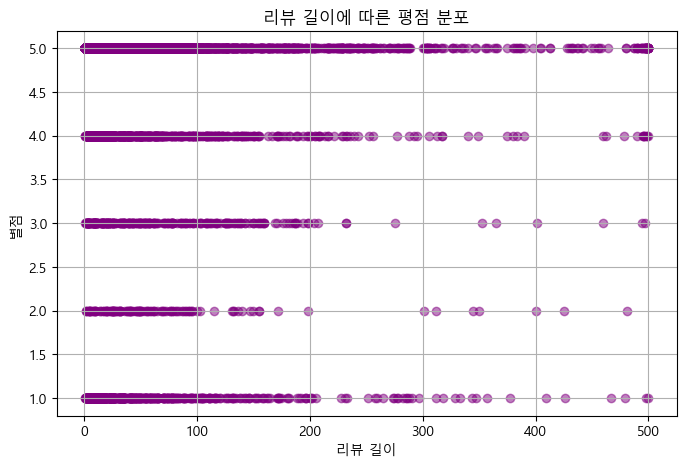

In [9]:
# Execute the visualizations
visualize_score_distribution(df_trickcal)
visualize_review_trends(df_trickcal)
visualize_sentiment_distribution(df_trickcal)
visualize_keyword_frequency(df_trickcal)
visualize_review_length_vs_score(df_trickcal)